This is to develop some test cases for the PAL function. 

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd 
import os 
import numpy as np 
DATADIR = '../data'
%matplotlib inline 

%load_ext autoreload
%autoreload 2

TRAIN_SIZE = 0.01

Here, there is one optimal point.

In [ ]:
import sys

In [ ]:
sys.path.append('../')

In [4]:
from dispersant_screener.pal import pal
from dispersant_screener.utils import get_maxmin_samples, get_kmeans_samples 

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, Matern, RationalQuadratic, DotProduct
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [5]:
gpr = GaussianProcessRegressor(kernel = RationalQuadratic(), normalize_y=True, n_restarts_optimizer=20)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_full_factorial_feat = pd.read_csv(os.path.join(DATADIR, 'new_features_full_random.csv')).values
a2 = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large.csv'))['A2_normalized'].values
gibbs = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_deltaG.csv'))['deltaGmin'].values
rg = pd.read_csv(os.path.join(DATADIR, 'rg_results.csv'))['Rg'].values
y = np.hstack([rg.reshape(-1,1), gibbs.reshape(-1,1)])
assert len(df_full_factorial_feat) == len(a2) == len(gibbs) == len(y)

 For now, do the scaling on all the data as it is a bit easier 

In [8]:
vt = VarianceThreshold(0)
X = vt.fit_transform(df_full_factorial_feat)

feat_scaler = StandardScaler()
X = feat_scaler.fit_transform(X)

label_scaler = StandardScaler()
y = label_scaler.fit_transform(y)

X_train, y_train, greedy_indices = get_kmeans_samples(X, y, 15)


In [9]:
y_test = np.delete(y, greedy_indices, 0)
X_test = np.delete(X, greedy_indices, 0)

(array([0.01563624, 0.08900627, 0.17921533, 0.29287875, 0.3554237 ,
        0.34399722, 0.2976899 , 0.19485157, 0.08419512, 0.01744042]),
 array([-2.68269677, -2.14803305, -1.61336934, -1.07870562, -0.54404191,
        -0.00937819,  0.52528552,  1.05994923,  1.59461295,  2.12927666,
         2.66394038]),
 <a list of 10 Patch objects>)

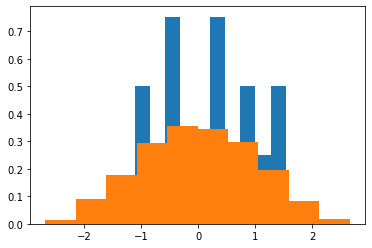

In [10]:
plt.hist(y_train[:,1], density=True)
plt.hist(y_test[:,1], density=True)

In [11]:
pareto_optimal, hypervolumes, gps = pal([gpr, gpr], X_train, y_train, X_test, y_test, 
                                        hv_reference=[5, 5],
                                        epsilon=0.01, delta=0.01)

2020-08-09 19:24:56,503 root         INFO     Starting now the PAL loop
2020-08-09 19:24:56,504 root         DEBUG    Will use the following settings
2020-08-09 19:24:56,506 root         DEBUG    epsilon: 0.01, delta: 0.01, iterations: 500
2020-08-09 19:24:56,507 root         DEBUG    x_train shape: (15, 31), y_train shape: (15, 2)
  0%|          | 0/500 [00:00<?, ?it/s]2020-08-09 19:24:56,511 root         DEBUG    Starting iteration 1
2020-08-09 19:24:56,512 root         DEBUG    Starting modeling step, fitting the GPs
2020-08-09 19:24:56,750 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-08-09 19:24:57,046 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-08-09 19:24:57,048 root         DEBUG    Scaling parameter beta at the current iteration is 3.075199038709347
2020-08-09 19:24:57,049 root         DEBUG    mean array shape: (3110, 2), std array shape: (3110, 2)
2020-08-09 19:24:57,051 root         DEBUG    mean array shape: (3110, 2), std array shape: (

In [12]:
selected_indices = np.where(np.array(pareto_optimal)==1)[0]

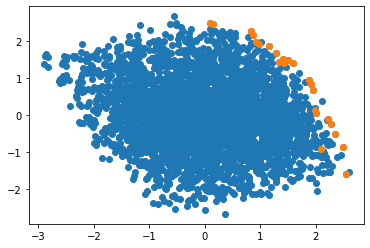

In [13]:
plt.scatter(y_test[:,0], y_test[:,1])
plt.scatter(y_test[selected_indices,0], y_test[selected_indices,1])

In [14]:
(120 + 15) / len(X) * 100

4.32

In [15]:
def plot_pareto(y, sampled): 
    plt.rcParams['font.family'] = 'sans-serif'
    fig, ax = plt.subplots(1,1)
    
    ax.scatter(y_test[:,0], y_test[:,1])
    ax.scatter(y_test[selected_indices,0], y_test[selected_indices,1])

    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)
    
    ax.set_xlabel(r'$y_{0}$')
    ax.set_xlabel(r'$y_{1}$')
    
    fig.tight_layout()

In [ ]:
plot_pareto(y, selected_indices)

/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  if __name__ == '__main__':
/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
2020-08-09 19:41:32,108 matplotlib.font_manager DEBUG    findfont: Matching STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-08-09 19:41:32,121 matplotlib.font_manager DEBUG    findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
2020-08-09 19:41:32,122 matplotlib.font_manager DEBUG    findfont: score(<Font 'STIXGenera